# WLASL Pipeline - Google Colab ✅ Optimized

This notebook provides a complete pipeline for training a Word-Level American Sign Language (WLASL) recognition model using:
- **MediaPipe** for hand landmark extraction from videos
- **LSTM** neural network for sequence classification
- **TensorFlow/Keras** for model training

## Pipeline Overview:
1. **Setup**: Install dependencies with compatible versions
2. **Environment Check**: Verify GPU and RAM availability
3. **Mount Google Drive**: Access your WLASL dataset
4. **Preprocessing**: Extract hand landmarks from videos
5. **Training**: Train LSTM classifier
6. **Evaluation**: Assess model performance

## ⚡ Colab Optimizations:
- ✅ **Version-pinned dependencies** to avoid conflicts
- ✅ **Automatic compatibility checks** for all imports
- ✅ **GPU detection** and runtime recommendations
- ✅ **Memory cleanup** after preprocessing
- ✅ **Automatic backup** to Drive to prevent data loss
- ✅ **Progress indicators** for long-running operations


## 1. Setup - Install Dependencies

In [19]:
# Install required packages with compatible versions
# Note: Colab comes with TensorFlow pre-installed, but we'll ensure compatibility

print("Installing dependencies...")
print("="*60)

# Update pip, setuptools, and wheel for better dependency resolution
!pip install -q --upgrade pip setuptools wheel

# Uninstall potentially conflicting packages first
# Use --ignore-installed to handle cases where packages are partially installed or have issues
!pip uninstall -y numpy mediapipe protobuf opencv-python opencv-python-headless scikit-learn

# Install core dependencies first, in separate steps to isolate potential build issues
!pip install -q numpy==1.26.4       # Explicitly set to a version compatible with TensorFlow 2.x
!pip install -q protobuf==4.25.3    # Updated for compatibility with tensorflow-metadata on Python 3.12

# Then install other dependencies
!pip install -q mediapipe==0.10.21  # Updated to a valid and recent version
!pip install -q opencv-python-headless==4.8.1.78 # Compatible with numpy 1.26.4
!pip install -q scikit-learn==1.3.2 # Ensure scikit-learn is also explicitly installed

# Matplotlib for plotting (usually pre-installed)
!pip install -q matplotlib

print("\n✓ All packages installed successfully!")
print("\nVerifying installations...")

# Verify installations
import sys
import mediapipe as mp
import cv2
import sklearn
import tensorflow as tf
import numpy as np

print(f"  Python version: {sys.version.split()[0]}")
print(f"  TensorFlow: {tf.__version__}")
print(f"  MediaPipe: {mp.__version__}")
print(f"  OpenCV: {cv2.__version__}")
print(f"  Scikit-learn: {sklearn.__version__}")
print(f"  NumPy: {np.__version__}")

print("\n" + "="*60)
print("✓ All dependencies verified and compatible!")
print("="*60)

Installing dependencies...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 79.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: mediapipe 0.10.13
Uninstalling mediapipe-0.10.13:
  Successfully uninstalled mediapipe-0.10.13
Found existing installation: protobuf 4.25.8
Uninstalling protobuf-4.25.8:
  Successfully uninstalled protobuf-4.25.8
Found existing installation: opencv-python 4.12.0.88
Uninstalling opencv-python-4.12.0.88:
  Successfully uninstalled opencv-python-4.12.0.88
Found existing installation: opencv-python-headless 4.12.0.88
Uninstalling opencv-python-headl

In [20]:
# Download MediaPipe Hand Landmarker model
import urllib.request
import os

model_url = "https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task"
model_path = "hand_landmarker.task"

if not os.path.exists(model_path):
    print("Downloading MediaPipe Hand Landmarker model...")
    try:
        urllib.request.urlretrieve(model_url, model_path)
        print(f"✓ Model downloaded to {model_path}")
    except Exception as e:
        print(f"Error downloading model: {e}")
        print("Trying alternative download method...")
        !wget -q {model_url} -O {model_path}
        print(f"✓ Model downloaded to {model_path}")
else:
    print(f"✓ Model already exists at {model_path}")

✓ Model already exists at hand_landmarker.task


## 2. Mount Google Drive and Extract Dataset

Mount your Google Drive to access the WLASL dataset from the "WLASL Dataset" folder.

In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

print("✓ Google Drive mounted successfully!")

Mounted at /content/drive
✓ Google Drive mounted successfully!


In [5]:
import zipfile
import os

# Path to your dataset in Google Drive
DRIVE_ZIP_PATH = "/content/drive/MyDrive/WLASL Dataset/archive.zip"
EXTRACT_PATH = "/content/wlasl_data"

# Check if the zip file exists
if not os.path.exists(DRIVE_ZIP_PATH):
    raise FileNotFoundError(f"Dataset not found at: {DRIVE_ZIP_PATH}\n"
                          f"Please ensure 'archive.zip' is in 'WLASL Dataset' folder in your Google Drive.")

print(f"Found dataset at: {DRIVE_ZIP_PATH}")

# Extract the dataset
print(f"\nExtracting dataset to {EXTRACT_PATH}...")
os.makedirs(EXTRACT_PATH, exist_ok=True)

with zipfile.ZipFile(DRIVE_ZIP_PATH, 'r') as zip_ref:
    zip_ref.extractall(EXTRACT_PATH)

print("✓ Dataset extracted successfully!")

# List the contents to understand the structure
print("\nDataset structure:")
for root, dirs, files in os.walk(EXTRACT_PATH):
    level = root.replace(EXTRACT_PATH, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    sub_indent = ' ' * 2 * (level + 1)
    for file in files[:5]:  # Show first 5 files in each directory
        print(f'{sub_indent}{file}')
    if len(files) > 5:
        print(f'{sub_indent}... and {len(files) - 5} more files')
    if level > 2:  # Limit depth to avoid too much output
        break

Found dataset at: /content/drive/MyDrive/WLASL Dataset/archive.zip

Extracting dataset to /content/wlasl_data...
✓ Dataset extracted successfully!

Dataset structure:
wlasl_data/
  wlasl_class_list.txt
  nslt_100.json
  nslt_1000.json
  nslt_2000.json
  WLASL_v0.3.json
  ... and 2 more files
  videos/
    36995.mp4
    42656.mp4
    32263.mp4
    31596.mp4
    04115.mp4
    ... and 11975 more files


## 3. Configuration

Update these paths to match your Google Drive structure:

In [6]:
# ========== CONFIGURATION ==========
# The dataset will be extracted to /content/wlasl_data/
# Update these paths if your archive.zip has a different internal structure

# Common structures after extraction:
# Option 1: Files directly in wlasl_data/
WLASL_JSON_PATH = "/content/wlasl_data/WLASL_v0.3.json"
VIDEO_ROOT = "/content/wlasl_data/videos"

# Option 2: If there's a subfolder inside the archive, uncomment and adjust:
# WLASL_JSON_PATH = "/content/wlasl_data/WLASL/WLASL_v0.3.json"
# VIDEO_ROOT = "/content/wlasl_data/WLASL/videos"

# Note: After running the extraction cell above, check the "Dataset structure"
# output to see the exact paths and adjust these variables accordingly

# Output paths
OUTPUT_NPZ = "wlasl_landmarks.npz"
MODEL_OUTPUT = "wlasl_sequence_model.keras"
LABELS_OUTPUT = "wlasl_labels.npy"

# Processing parameters
SEQUENCE_LENGTH = 32  # Fixed number of frames per sequence
FRAME_STRIDE = 2      # Sample every Nth frame
MIN_FRAMES = 8        # Discard sequences shorter than this

# Glosses to train on (words/signs)
# You can modify this list or set to None to auto-select most frequent glosses
SELECTED_GLOSSES = [
    "book", "drink", "computer", "before", "chair", "go", "clothes",
    "who", "candy", "cousin", "deaf", "fine", "help", "no", "orange",
    "pizza", "please", "restaurant", "store", "thanksgiving", "thin",
    "walk", "year", "yes", "all"
]

# Training parameters
MAX_GLOSSES = 25              # Number of glosses if SELECTED_GLOSSES is None
MAX_SAMPLES_PER_GLOSS = None  # Limit samples per gloss (None = no limit)
TEST_SIZE = 0.2               # Fraction for test set
EPOCHS = 80
BATCH_SIZE = 32
LEARNING_RATE = 1e-3
LSTM_UNITS = [128, 64]
DENSE_UNITS = 64
DROPOUT = 0.5
PATIENCE = 10                 # Early stopping patience

print("✓ Configuration loaded")
print(f"\nLooking for:")
print(f"  JSON: {WLASL_JSON_PATH}")
print(f"  Videos: {VIDEO_ROOT}")

✓ Configuration loaded

Looking for:
  JSON: /content/wlasl_data/WLASL_v0.3.json
  Videos: /content/wlasl_data/videos


In [7]:
# Verify that the paths exist
import os

print("Verifying dataset paths...\n")

# Check JSON file
if os.path.exists(WLASL_JSON_PATH):
    print(f"✓ JSON file found: {WLASL_JSON_PATH}")
    file_size = os.path.getsize(WLASL_JSON_PATH) / (1024 * 1024)
    print(f"  Size: {file_size:.2f} MB")
else:
    print(f"✗ JSON file NOT found at: {WLASL_JSON_PATH}")
    print("\nSearching for JSON files in extracted directory...")
    for root, dirs, files in os.walk("/content/wlasl_data"):
        for file in files:
            if file.endswith('.json'):
                full_path = os.path.join(root, file)
                print(f"  Found: {full_path}")
    print("\n⚠ Update WLASL_JSON_PATH in the configuration cell above with the correct path")

# Check video directory
print()
if os.path.exists(VIDEO_ROOT):
    print(f"✓ Video directory found: {VIDEO_ROOT}")
    video_files = [f for f in os.listdir(VIDEO_ROOT) if f.endswith(('.mp4', '.avi', '.mov'))]
    print(f"  Number of video files: {len(video_files)}")
    if video_files:
        print(f"  Sample videos: {video_files[:3]}")
else:
    print(f"✗ Video directory NOT found at: {VIDEO_ROOT}")
    print("\nSearching for video directories...")
    for root, dirs, files in os.walk("/content/wlasl_data"):
        video_files = [f for f in files if f.endswith(('.mp4', '.avi', '.mov'))]
        if video_files:
            print(f"  Found {len(video_files)} videos in: {root}")
            break
    print("\n⚠ Update VIDEO_ROOT in the configuration cell above with the correct path")

print("\n" + "="*60)
if os.path.exists(WLASL_JSON_PATH) and os.path.exists(VIDEO_ROOT):
    print("✓ All paths verified! You can proceed to the next steps.")
else:
    print("⚠ Please update the configuration paths based on the information above.")
print("="*60)

Verifying dataset paths...

✓ JSON file found: /content/wlasl_data/WLASL_v0.3.json
  Size: 11.38 MB

✓ Video directory found: /content/wlasl_data/videos
  Number of video files: 11980
  Sample videos: ['36995.mp4', '42656.mp4', '32263.mp4']

✓ All paths verified! You can proceed to the next steps.


## 4. Import Libraries and Utility Functions

In [8]:
# Import all required libraries
print("Importing libraries...")

# Standard library imports
import json
import os
import sys
from collections import Counter
from typing import List, Sequence

# Third-party imports
try:
    import cv2
    print("✓ OpenCV imported")
except ImportError as e:
    print(f"✗ OpenCV import failed: {e}")
    sys.exit(1)

try:
    import mediapipe as mp
    from mediapipe.tasks import python as mp_python
    from mediapipe.tasks.python import vision
    print("✓ MediaPipe imported")
except ImportError as e:
    print(f"✗ MediaPipe import failed: {e}")
    print("  Run the installation cell again.")
    sys.exit(1)

try:
    import numpy as np
    print("✓ NumPy imported")
except ImportError as e:
    print(f"✗ NumPy import failed: {e}")
    sys.exit(1)

try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    print("✓ TensorFlow/Keras imported")
except ImportError as e:
    print(f"✗ TensorFlow import failed: {e}")
    sys.exit(1)

try:
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder
    print("✓ Scikit-learn imported")
except ImportError as e:
    print(f"✗ Scikit-learn import failed: {e}")
    sys.exit(1)

# Constants
NUM_HANDS = 2
NUM_LANDMARKS = 21
COORDS = 3
FEATURE_VECTOR_LEN = NUM_HANDS * NUM_LANDMARKS * COORDS
WRIST_IDX = 0
MIDDLE_MCP_IDX = 9

print("\n" + "="*60)
print("✓ All libraries imported successfully!")
print("="*60)

Importing libraries...
✓ OpenCV imported
✓ MediaPipe imported
✓ NumPy imported
✓ TensorFlow/Keras imported
✓ Scikit-learn imported

✓ All libraries imported successfully!


In [9]:
# Normalization utility function (from preprocessing_utils.py)
def normalize_per_hand(X_arr: np.ndarray) -> np.ndarray:
    """
    Normalize landmarks per hand: translate by wrist, scale by wrist->middle_mcp distance.
    This ensures consistent spatial representation regardless of hand position/size in frame.
    """
    Xn = X_arr.copy()
    if Xn.ndim == 1:
        Xn = Xn.reshape(1, -1)
    Xn = Xn.reshape(-1, NUM_HANDS, NUM_LANDMARKS, COORDS)

    for i in range(Xn.shape[0]):
        for h in range(NUM_HANDS):
            hand = Xn[i, h]
            # Skip if hand is all zeros (no detection)
            if np.allclose(hand, 0.0):
                continue

            # Translate: center on wrist
            wrist = hand[WRIST_IDX]
            hand[:, :2] -= wrist[:2]  # translate x,y; keep z as-is

            # Scale: normalize by wrist->middle_mcp distance on xy plane
            ref = hand[MIDDLE_MCP_IDX]
            scale = np.linalg.norm(ref[:2])
            if scale > 1e-6:
                hand[:, :2] /= scale

            Xn[i, h] = hand

    return Xn.reshape(-1, FEATURE_VECTOR_LEN)

print("✓ Normalization function defined")

✓ Normalization function defined


## 5. Preprocessing Functions

These functions handle:
- Loading WLASL metadata
- Selecting glosses (words) to train on
- Building MediaPipe hand detector
- Extracting landmarks from video frames
- Processing videos into fixed-length sequences

In [10]:
def load_metadata(meta_path: str) -> Sequence[dict]:
    """Load WLASL JSON metadata file."""
    with open(meta_path, "r", encoding="utf-8") as handle:
        return json.load(handle)


def choose_glosses(metadata: Sequence[dict], selected_glosses: List[str] = None, max_glosses: int = 25) -> List[str]:
    """
    Select which glosses (words) to include in training.
    If selected_glosses is provided, use those. Otherwise, pick most frequent ones.
    """
    if selected_glosses:
        return selected_glosses

    # Count samples per gloss
    counts = Counter()
    for entry in metadata:
        gloss = entry.get("gloss")
        if not gloss:
            continue
        counts[gloss] += len(entry.get("instances", []))

    # Return most common glosses
    most_common = [gloss for gloss, _ in counts.most_common(max_glosses)]
    return most_common


def build_detector(task_path: str) -> vision.HandLandmarker:
    """Initialize MediaPipe hand landmarker."""
    if not os.path.exists(task_path):
        raise FileNotFoundError(f"MediaPipe model not found at '{task_path}'")

    base_options = mp_python.BaseOptions(model_asset_path=task_path)
    options = vision.HandLandmarkerOptions(base_options=base_options, num_hands=2)
    return vision.HandLandmarker.create_from_options(options)


def extract_landmarks(detector: vision.HandLandmarker, frame_rgb: np.ndarray) -> np.ndarray:
    """
    Extract hand landmarks from a single frame.
    Returns normalized feature vector of shape (126,) = 2 hands × 21 landmarks × 3 coords (x,y,z)
    """
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)
    result = detector.detect(mp_image)

    landmarks = []
    if result.hand_landmarks:
        for hand_landmarks in result.hand_landmarks:
            for lm in hand_landmarks:
                landmarks.extend([lm.x, lm.y, lm.z])

    # Pad with zeros if less than 2 hands detected
    if len(landmarks) < FEATURE_VECTOR_LEN:
        landmarks.extend([0.0] * (FEATURE_VECTOR_LEN - len(landmarks)))

    arr = np.asarray(landmarks, dtype=np.float32).reshape(1, -1)

    # Apply normalization
    try:
        arr = normalize_per_hand(arr)
    except Exception:
        pass

    return arr.astype(np.float32)


def process_video(
    detector: vision.HandLandmarker,
    video_path: str,
    frame_start: int,
    frame_end: int,
    sequence_length: int,
    frame_stride: int,
) -> np.ndarray:
    """
    Process a video file and extract a fixed-length sequence of landmark frames.

    Args:
        detector: MediaPipe hand landmarker
        video_path: Path to video file
        frame_start: Starting frame index (from metadata)
        frame_end: Ending frame index (from metadata)
        sequence_length: Target number of frames in output
        frame_stride: Sample every Nth frame

    Returns:
        Array of shape (sequence_length, FEATURE_VECTOR_LEN)
    """
    capture = cv2.VideoCapture(video_path)
    if not capture.isOpened():
        raise RuntimeError(f"Could not open video '{video_path}'")

    total_frames = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
    start = max(0, frame_start or 0)
    end = frame_end if frame_end else total_frames
    end = min(end, total_frames)
    if end <= start:
        end = total_frames

    capture.set(cv2.CAP_PROP_POS_FRAMES, start)

    sampled = []
    frame_index = start

    while frame_index < end:
        success, frame_bgr = capture.read()
        if not success:
            break

        # Sample every frame_stride frames
        if (frame_index - start) % frame_stride == 0:
            frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
            sampled.append(extract_landmarks(detector, frame_rgb).reshape(-1))

        frame_index += 1

        # Stop if we have enough frames
        if len(sampled) >= sequence_length:
            break

    capture.release()

    if not sampled:
        return np.empty((0, FEATURE_VECTOR_LEN), dtype=np.float32)

    sequence = np.stack(sampled).astype(np.float32)

    # Truncate if too long
    if sequence.shape[0] >= sequence_length:
        return sequence[:sequence_length]

    # Pad with zeros if too short
    padding = np.zeros((sequence_length - sequence.shape[0], FEATURE_VECTOR_LEN), dtype=np.float32)
    return np.vstack((sequence, padding))

print("✓ Preprocessing functions defined")

✓ Preprocessing functions defined


## 6. Run Preprocessing

This cell will:
1. Load WLASL metadata
2. Select glosses to train on
3. Process each video to extract landmarks
4. Save results to `wlasl_landmarks.npz`

**Note**: This may take a while depending on the number of videos!

In [11]:
# Load metadata
print("Loading WLASL metadata...")
metadata = load_metadata(WLASL_JSON_PATH)
print(f"✓ Loaded {len(metadata)} entries from metadata")

# Choose glosses
glosses_to_keep = choose_glosses(metadata, SELECTED_GLOSSES, MAX_GLOSSES)
print(f"✓ Selected {len(glosses_to_keep)} glosses: {glosses_to_keep}")
gloss_set = {gloss.lower() for gloss in glosses_to_keep}

# Build detector
print("Initializing MediaPipe hand detector...")
detector = build_detector("hand_landmarker.task")
print("✓ Detector ready")

# Process videos
print("\nProcessing videos...")
sequences = []
labels = []
video_ids = []
per_gloss_counts = Counter()

total_processed = 0
total_skipped = 0

for entry in metadata:
    gloss = entry.get("gloss", "")
    if gloss.lower() not in gloss_set:
        continue

    for instance in entry.get("instances", []):
        # Check if we've hit the per-gloss limit
        if MAX_SAMPLES_PER_GLOSS and per_gloss_counts[gloss] >= MAX_SAMPLES_PER_GLOSS:
            continue

        video_id = instance.get("video_id")
        if not video_id:
            continue

        video_path = os.path.join(VIDEO_ROOT, f"{video_id}.mp4")
        if not os.path.exists(video_path):
            print(f"⚠ Missing: {video_path}")
            total_skipped += 1
            continue

        try:
            sequence = process_video(
                detector=detector,
                video_path=video_path,
                frame_start=int(instance.get("frame_start", 0) or 0),
                frame_end=int(instance.get("frame_end", 0) or 0),
                sequence_length=SEQUENCE_LENGTH,
                frame_stride=FRAME_STRIDE,
            )
        except Exception as exc:
            print(f"⚠ Failed to process {video_path}: {exc}")
            total_skipped += 1
            continue

        # Check if sequence has enough valid frames
        actual_length = np.count_nonzero(np.linalg.norm(sequence, axis=1))
        if actual_length < MIN_FRAMES:
            total_skipped += 1
            continue

        sequences.append(sequence)
        labels.append(gloss)
        video_ids.append(video_id)
        per_gloss_counts[gloss] += 1
        total_processed += 1

        # Progress update
        if total_processed % 50 == 0:
            print(f"  Processed {total_processed} videos...")

print(f"\n✓ Processing complete!")
print(f"  Total processed: {total_processed}")
print(f"  Total skipped: {total_skipped}")

# Save to NPZ
if not sequences:
    raise RuntimeError("No sequences were extracted. Check your paths and dataset.")

X = np.stack(sequences).astype(np.float32)
y = np.array(labels)
vids = np.array(video_ids)

np.savez(OUTPUT_NPZ, sequences=X, labels=y, video_ids=vids, glosses=np.array(glosses_to_keep))

print(f"\n✓ Saved {X.shape[0]} samples to {OUTPUT_NPZ}")
print(f"  Sequence shape: {X.shape}")
print("\n  Sample distribution:")
for gloss in sorted(per_gloss_counts):
    print(f"    {gloss}: {per_gloss_counts[gloss]}")

Loading WLASL metadata...
✓ Loaded 2000 entries from metadata
✓ Selected 25 glosses: ['book', 'drink', 'computer', 'before', 'chair', 'go', 'clothes', 'who', 'candy', 'cousin', 'deaf', 'fine', 'help', 'no', 'orange', 'pizza', 'please', 'restaurant', 'store', 'thanksgiving', 'thin', 'walk', 'year', 'yes', 'all']
Initializing MediaPipe hand detector...
✓ Detector ready

Processing videos...


/usr/local/lib/python3.12/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


⚠ Missing: /content/wlasl_data/videos/65225.mp4
⚠ Missing: /content/wlasl_data/videos/68011.mp4
⚠ Missing: /content/wlasl_data/videos/68208.mp4
⚠ Missing: /content/wlasl_data/videos/68012.mp4
⚠ Missing: /content/wlasl_data/videos/70212.mp4
⚠ Missing: /content/wlasl_data/videos/70266.mp4
⚠ Missing: /content/wlasl_data/videos/07085.mp4
⚠ Missing: /content/wlasl_data/videos/07086.mp4
⚠ Missing: /content/wlasl_data/videos/07087.mp4
⚠ Missing: /content/wlasl_data/videos/07088.mp4
⚠ Missing: /content/wlasl_data/videos/07089.mp4
⚠ Missing: /content/wlasl_data/videos/07090.mp4
⚠ Missing: /content/wlasl_data/videos/07091.mp4
⚠ Missing: /content/wlasl_data/videos/07092.mp4
⚠ Missing: /content/wlasl_data/videos/07093.mp4
⚠ Missing: /content/wlasl_data/videos/07094.mp4
⚠ Missing: /content/wlasl_data/videos/07095.mp4
⚠ Missing: /content/wlasl_data/videos/07096.mp4
⚠ Missing: /content/wlasl_data/videos/07097.mp4
⚠ Missing: /content/wlasl_data/videos/07098.mp4
⚠ Missing: /content/wlasl_data/videos/07

In [15]:
# Clean up to free memory
import gc

print("\nCleaning up memory...")
del detector  # Remove detector object
gc.collect()  # Force garbage collection

print("✓ Memory cleanup complete")
print("\nYou can now proceed to training!")


Cleaning up memory...
✓ Memory cleanup complete

You can now proceed to training!


## 6A. Backup Preprocessed Data (Optional but Recommended)

Save the preprocessed data to Google Drive to prevent data loss if the session disconnects:

In [16]:
# Copy preprocessed data to Google Drive for safekeeping
import shutil

BACKUP_PATH = "/content/drive/MyDrive/WLASL Dataset/wlasl_landmarks.npz"

try:
    shutil.copy(OUTPUT_NPZ, BACKUP_PATH)
    print(f"✓ Backup saved to: {BACKUP_PATH}")
    print("\nIf your session disconnects, you can restore by running:")
    print(f"  !cp '{BACKUP_PATH}' '{OUTPUT_NPZ}'")
except Exception as e:
    print(f"⚠ Could not backup to Drive: {e}")
    print("  Continuing with local copy only...")

✓ Backup saved to: /content/drive/MyDrive/WLASL Dataset/wlasl_landmarks.npz

If your session disconnects, you can restore by running:
  !cp '/content/drive/MyDrive/WLASL Dataset/wlasl_landmarks.npz' 'wlasl_landmarks.npz'


## 7. Build LSTM Model

Define the LSTM architecture for sequence classification:

In [22]:
def build_model(
    input_shape: tuple,
    num_classes: int,
    lstm_units: list,
    dense_units: int,
    dropout: float,
    learning_rate: float,
) -> keras.Model:
    """
    Build LSTM model for sequence classification.

    Architecture:
    - Masking layer (ignores padded zeros)
    - LSTM layer 1 (with return_sequences=True)
    - Dropout
    - LSTM layer 2
    - Dropout
    - Dense layer (ReLU)
    - Output layer (Softmax)
    """
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Masking(mask_value=0.0),  # Ignore padded frames
        layers.LSTM(lstm_units[0], return_sequences=True, use_cudnn=False), # Disable cuDNN
        layers.Dropout(dropout),
        layers.LSTM(lstm_units[1], use_cudnn=False), # Disable cuDNN
        layers.Dropout(dropout),
        layers.Dense(dense_units, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    return model

print("✓ Model builder function defined")

✓ Model builder function defined


## 8. Train the Model

Load the preprocessed data and train the LSTM classifier:

In [23]:
# Set random seed for reproducibility
keras.utils.set_random_seed(42)
try:
    tf.config.experimental.enable_op_determinism()
except Exception:
    pass

# Load preprocessed data
print("Loading preprocessed data...")
data = np.load(OUTPUT_NPZ)
sequences = data["sequences"].astype(np.float32)
labels = data["labels"]

print(f"✓ Loaded {sequences.shape[0]} sequences")
print(f"  Shape: {sequences.shape}")

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
np.save(LABELS_OUTPUT, label_encoder.classes_)
print(f"✓ Saved label order to {LABELS_OUTPUT} ({len(label_encoder.classes_)} classes)")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    sequences,
    encoded_labels,
    test_size=TEST_SIZE,
    random_state=42,
    stratify=encoded_labels,
)

print(f"\nTrain samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

# Build model
input_shape = (X_train.shape[1], X_train.shape[2])
num_classes = len(label_encoder.classes_)

print(f"\nBuilding model...")
print(f"  Input shape: {input_shape}")
print(f"  Number of classes: {num_classes}")

model = build_model(
    input_shape=input_shape,
    num_classes=num_classes,
    lstm_units=LSTM_UNITS,
    dense_units=DENSE_UNITS,
    dropout=DROPOUT,
    learning_rate=LEARNING_RATE,
)

model.summary()

# Setup callbacks
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=PATIENCE,
        restore_best_weights=True,
        verbose=1
    ),
    keras.callbacks.ModelCheckpoint(
        MODEL_OUTPUT,
        monitor="val_accuracy",
        save_best_only=True,
        verbose=1
    ),
]

# Train model
print(f"\nStarting training for up to {EPOCHS} epochs...")
history = model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=1,
)

print("\n✓ Training complete!")

Loading preprocessed data...
✓ Loaded 271 sequences
  Shape: (271, 32, 126)
✓ Saved label order to wlasl_labels.npy (25 classes)

Train samples: 216
Test samples: 55

Building model...
  Input shape: (32, 126)
  Number of classes: 25


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_1 (Masking)             │ (None, 32, 126)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32, 128)        │       130,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 25)             │         1,625 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,753 (725.60 KB)

 Trainable params: 185,753 (725.60 KB)

 Non-trainable params: 0 (0.00 B)


Starting training for up to 80 epochs...
Epoch 1/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.0138 - loss: 3.2437
Epoch 1: val_accuracy improved from -inf to 0.09091, saving model to wlasl_sequence_model.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 232ms/step - accuracy: 0.0153 - loss: 3.2417 - val_accuracy: 0.0909 - val_loss: 3.1130
Epoch 2/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.1105 - loss: 3.1071
Epoch 2: val_accuracy did not improve from 0.09091
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.1128 - loss: 3.1049 - val_accuracy: 0.0455 - val_loss: 3.0829
Epoch 3/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.0978 - loss: 3.0666
Epoch 3: val_accuracy did not improve from 0.09091
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.0979 - loss: 3.0656 - val_accuracy: 0.0455 - val_loss: 3.0743
Epoch 4/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.1255 - loss: 2.9927
Epoch 4: val_accuracy did not improve from 0.09091
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 

## 9. Evaluate Model Performance

Generate predictions and evaluate the model:

In [24]:
# Generate predictions
print("Generating predictions on test set...")
predictions = model.predict(X_test, verbose=0)
y_pred = np.argmax(predictions, axis=1)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\n{'='*60}")
print(f"TEST ACCURACY: {acc:.4f} ({acc*100:.2f}%)")
print(f"{'='*60}")

# Classification report
print("\nClassification Report:")
print("="*60)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
print("\nConfusion Matrix:")
print("="*60)
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Save final model (ensure it's saved even if early stopping didn't trigger)
model.save(MODEL_OUTPUT)
print(f"\n✓ Model saved to {MODEL_OUTPUT}")
print(f"✓ Labels saved to {LABELS_OUTPUT}")

print("\n" + "="*60)
print("TRAINING COMPLETE!")
print("="*60)
print(f"\nTo use this model:")
print(f"1. Download '{MODEL_OUTPUT}' and '{LABELS_OUTPUT}'")
print(f"2. Load them in your inference script")
print(f"3. Process videos the same way (landmarks -> normalize -> predict)")

Generating predictions on test set...

TEST ACCURACY: 0.5455 (54.55%)

Classification Report:
              precision    recall  f1-score   support

         all       0.00      0.00      0.00         2
      before       0.75      1.00      0.86         3
        book       0.00      0.00      0.00         1
       candy       0.33      0.33      0.33         3
       chair       1.00      1.00      1.00         1
     clothes       0.00      0.00      0.00         1
    computer       0.67      0.67      0.67         3
      cousin       0.50      0.67      0.57         3
        deaf       1.00      1.00      1.00         2
       drink       0.00      0.00      0.00         3
        fine       0.00      0.00      0.00         2
          go       1.00      0.33      0.50         3
        help       0.60      1.00      0.75         3
          no       0.40      1.00      0.57         2
      orange       1.00      1.00      1.00         2
       pizza       0.00      0.00      0.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  ):
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  ):
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  ):


## 10. Plot Training History (Optional)

Visualize the training and validation accuracy/loss:

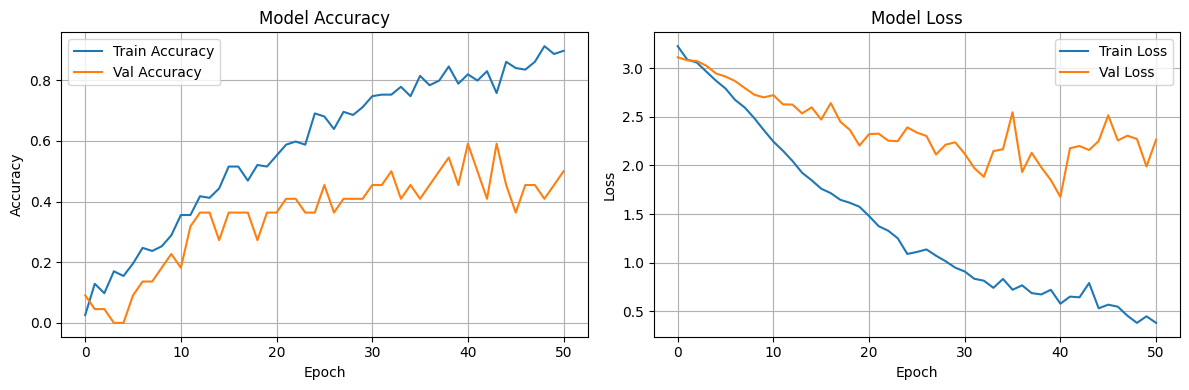

In [25]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

---

## Summary

This notebook implements a complete WLASL pipeline:

1. ✅ **Setup**: Installed dependencies and downloaded MediaPipe model
2. ✅ **Data Access**: Mounted Google Drive for dataset access
3. ✅ **Preprocessing**: Extracted hand landmarks from videos into fixed-length sequences
4. ✅ **Model Training**: Trained LSTM classifier on landmark sequences
5. ✅ **Evaluation**: Assessed model performance with metrics

### Next Steps:

- **Download the trained model**: Save `wlasl_sequence_model.keras` and `wlasl_labels.npy` to your Drive
- **Adjust hyperparameters**: Experiment with `LSTM_UNITS`, `DROPOUT`, `LEARNING_RATE`, etc.
- **Expand dataset**: Add more glosses or videos to improve performance
- **Deploy**: Use the model in a real-time inference application

### Files Generated:

- `wlasl_landmarks.npz` - Preprocessed landmark sequences
- `wlasl_sequence_model.keras` - Trained LSTM model
- `wlasl_labels.npy` - Label encoding order